In [1]:
# Import Pytorch library and check version
import torch
import torchvision
print(torch.__version__)

1.6.0


In [2]:
# Import Libraries

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Folder name containing data
C_data_dir = '/home/byounghan/바탕화면/peri/C'
nonC_data_dir = '/home/byounghan/바탕화면/peri/nonC'

In [4]:
# List containing the paths of images. (해당 실습에서는 10,000개의 데이터만 사용할 예정입니다.)
# [Errno 5] Input/output error: 'ProstatEX_T2ax/T2ax' 라는 에러가 발생한다면 해당 코드를 다시 실행시켜 주세요.

img_paths = []

for x in os.listdir(C_data_dir):
  img_paths.append(os.path.join(C_data_dir, x))

img_paths = img_paths[:470]
print(len(img_paths))

470


In [5]:
# List containing the paths of images. (해당 실습에서는 10,000개의 데이터만 사용할 예정입니다.)
# [Errno 5] Input/output error: 'ProstatEX_T2ax/T2ax' 라는 에러가 발생한다면 해당 코드를 다시 실행시켜 주세요.


for x in os.listdir(nonC_data_dir):
  img_paths.append(os.path.join(nonC_data_dir, x))

img_paths = img_paths[:902]
print(len(img_paths))

902


Total number of images = 902


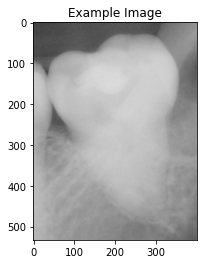

In [6]:
# Example Image Visualization
print("Total number of images = " + str(len(img_paths)))
plt.imshow(Image.open(img_paths[34]), 'gray')
plt.title("Example Image")
plt.show()

In [7]:
# Dataset Information DataFrame
info_df = pd.DataFrame(img_paths, columns=['img_path'])

In [8]:
## 
info_df.head(395)

,img_path
0,/home/byounghan/바탕화면/peri/C/0213-4.png
1,/home/byounghan/바탕화면/peri/C/0037-4.tif
2,/home/byounghan/바탕화면/peri/C/0031-4.tif
3,/home/byounghan/바탕화면/peri/C/0232-1.png
4,/home/byounghan/바탕화면/peri/C/0061-3.tif
...,...
390,/home/byounghan/바탕화면/peri/C/0152-1.png
391,/home/byounghan/바탕화면/peri/C/0146-3.png
392,/home/byounghan/바탕화면/peri/C/0064-1.tif
393,/home/byounghan/바탕화면/peri/C/0297-4.png


In [9]:
# Add 'C' column to DataFrame


def check_aug(path):
    res = ""
    if 'non' in path: # 파일경로에 "non" 이 있다면 ...
        res = 'nonC'
    else:
        res = 'C'
    return res

# Make 'aug' column
info_df['C/nonC'] = info_df['img_path'].apply(lambda x: check_aug(x))
def check_aug(path):
    res = ""
    if 'non' in path: # 파일경로에 "non" 이 있다면 ...
        res = 'nonC'
    else:
        res = 'C'
    return res

# Make 'aug' column
info_df['C/nonC'] = info_df['img_path'].apply(lambda x: check_aug(x))

In [10]:

def check_aug(path):
    res = ""
    if 'non' in path: # 파일경로에 "non" 이 있다면 ...
        res = 1
    else:
        res = 2
    return res

# Make 'aug' column
info_df['label'] = info_df['img_path'].apply(lambda x: check_aug(x))
def check_aug(path):
    res = ""
    if 'non' in path: # 파일경로에 "non" 이 있다면 ...
        res = 1
    else:
        res = 2
    return res

# Make 'aug' column
info_df['label'] = info_df['img_path'].apply(lambda x: check_aug(x))

In [11]:
info_df.head(395)

,img_path,C/nonC,label
0,/home/byounghan/바탕화면/peri/C/0213-4.png,C,2
1,/home/byounghan/바탕화면/peri/C/0037-4.tif,C,2
2,/home/byounghan/바탕화면/peri/C/0031-4.tif,C,2
3,/home/byounghan/바탕화면/peri/C/0232-1.png,C,2
4,/home/byounghan/바탕화면/peri/C/0061-3.tif,C,2
...,...,...,...
390,/home/byounghan/바탕화면/peri/C/0152-1.png,C,2
391,/home/byounghan/바탕화면/peri/C/0146-3.png,C,2
392,/home/byounghan/바탕화면/peri/C/0064-1.tif,C,2
393,/home/byounghan/바탕화면/peri/C/0297-4.png,C,2


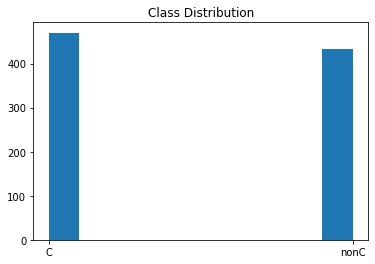

In [12]:
# Class Distributution Visualization

plt.hist(info_df['C/nonC'])
plt.title("Class Distribution")
plt.xticks([ 0., 1.])
plt.show()

In [13]:
# Split Train-Test Dataset

# Add 'Subset' column to DataFrame
# Subset : 0 = Train / 1 = Test
# Train set 80, Test set 20%

# Function for splitting train and test dataset
def SplitTrainTestDataset(df, label, train_test_ratio=0.80):
    target_rows = (df['label'] == label) 
    
    n_rows = sum(target_rows)
    n_train = int(n_rows * 0.80)
    n_test  = n_rows - n_train

    df.loc[target_rows, 'subset'] = [0] * n_train + [1] * n_test
    
# Train set 80%, Test set 20%
# Train set 80%, Test set 20%
SplitTrainTestDataset(info_df,1,0.8)
SplitTrainTestDataset(info_df,2,0.8)


In [14]:
# Show top 5 rows of current data frame

info_df.head(400)

,img_path,C/nonC,label,subset
0,/home/byounghan/바탕화면/peri/C/0213-4.png,C,2,0.0
1,/home/byounghan/바탕화면/peri/C/0037-4.tif,C,2,0.0
2,/home/byounghan/바탕화면/peri/C/0031-4.tif,C,2,0.0
3,/home/byounghan/바탕화면/peri/C/0232-1.png,C,2,0.0
4,/home/byounghan/바탕화면/peri/C/0061-3.tif,C,2,0.0
...,...,...,...,...
395,/home/byounghan/바탕화면/peri/C/0018-4.tif,C,2,1.0
396,/home/byounghan/바탕화면/peri/C/0266-1.png,C,2,1.0
397,/home/byounghan/바탕화면/peri/C/0008-3.tif,C,2,1.0
398,/home/byounghan/바탕화면/peri/C/0270-2.png,C,2,1.0


In [15]:
# Number of Case
info_df.groupby([info_df['C/nonC'], info_df['subset']]).count().unstack()

img_path     label    
subset      0.0 1.0   0.0 1.0
C/nonC                       
C           376  94   376  94
nonC        345  87   345  87

In [16]:
# Import pytorch libraries

import torch
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

import torchvision.models as models
from torchvision import transforms

In [17]:
# GPU Setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


In [18]:
# DataLoader

class PROSTATEx(Dataset):
  
    def __init__(self, info_df, subset):
        super(PROSTATEx, self).__init__()
        
        # subset이 0이면 trainset / 1이면 testset
        self.info_df = info_df[info_df['subset'] == 0] if subset == 'train' else info_df[info_df['subset'] == 1]
    
    def __getitem__(self, index):
        img_path = self.info_df.iloc[index].img_path
        label = self.info_df.iloc[index].label
        label = np.array([1, 0]) if label == 1 else np.array([0, 1])
        
        # png --> numpy array --> tensor
        img_array = Image.open(img_path).convert('RGB')  #여기부터 높이 픽셀 532~534로 open됨.  
        img_tensor = transforms.ToTensor()(img_array)
        
        #높이 532번째 픽셀까지만 사용
        img_tensor = img_tensor[:,0:532,:]
        
        return img_tensor, label
    
    def __len__(self):
        return len(self.info_df)

In [19]:
# Set Batch_size
batch_size = 10

In [20]:
# DataLoader Building

train_dataset = PROSTATEx(info_df, 'train')  # Train set
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = PROSTATEx(info_df, 'test')  # Test set 
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [21]:
# Resnet Model Building (Resnet50)
model = models.resnet50(num_classes = 2).to(device)

In [22]:
from torchsummary import summary
summary(model, (3,40,40))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 20, 20]           9,408
       BatchNorm2d-2           [-1, 64, 20, 20]             128
              ReLU-3           [-1, 64, 20, 20]               0
         MaxPool2d-4           [-1, 64, 10, 10]               0
            Conv2d-5           [-1, 64, 10, 10]           4,096
       BatchNorm2d-6           [-1, 64, 10, 10]             128
              ReLU-7           [-1, 64, 10, 10]               0
            Conv2d-8           [-1, 64, 10, 10]          36,864
       BatchNorm2d-9           [-1, 64, 10, 10]             128
             ReLU-10           [-1, 64, 10, 10]               0
           Conv2d-11          [-1, 256, 10, 10]          16,384
      BatchNorm2d-12          [-1, 256, 10, 10]             512
           Conv2d-13          [-1, 256, 10, 10]          16,384
      BatchNorm2d-14          [-1, 256,

In [23]:
# Set Learning Rate
lr = 3e-10

In [24]:
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)

In [25]:
# Loss Function
criterion = nn.BCEWithLogitsLoss().to(device)

In [28]:
# Hyper-parameter Setting
num_classes = 2  # 이진 분류 모델
epochs = 10000

In [27]:
# Main

'''
Epoch 횟수 만큼 Training 진행

  -- Model = Resnet50
  -- Loss Function = Binary Cross Entropy with logits Loss (BCEWithLogitsLoss)
  -- Optimizer = Adam
  -- Epoch = 1000
  -- Batch Size = 256 
  -- Learning Rate = 3e-5  (3 x 10−5)
'''

for epoch in range(epochs):
    # Training
    model.train()
    
    # Initialize Hyper Parameters
    epoch_loss = 0
    epoch_correct_cnt = 0
    step = 0
    n_samples = 0 

    for img, label in tqdm(train_data_loader, desc="Train [%d/%d]" % (epoch+1, epochs)):
        img, label = Variable(img).to(device).float(), Variable(label).to(device).float()
        
        # prediction with resnet50 model
        pred = model(img)

        true_label = torch.max(label, 1)[1].data.cpu().numpy()
        pred_label = torch.max(pred, 1)[1].data.cpu().numpy()

        # count num of correct prediction
        epoch_correct_cnt += int(sum(true_label == pred_label))
        
        # initialize accumulated gradients
        optimizer.zero_grad()
        
        # calculate loss  
        loss = criterion(pred, label)
        
        # backpropagation
        loss.backward()

        # parameter update based on gradient
        optimizer.step()

        # calculate epoch loss
        epoch_loss += loss * len(img)
        n_samples += len(img)

        # print loss every 5 step 
        if (step == 0) or (step+1) % 5 == 0:
            print('     > Step [%3d/%3d] Loss %.4f - Accuracy %.4f%%' % (step+1, len(train_data_loader), 
                                                                        epoch_loss/n_samples, epoch_correct_cnt/n_samples * 100.0))
        step +=1

    # save train loss every epoch    
    train_loss = epoch_loss / len(train_dataset)
    train_acc = epoch_correct_cnt / len(train_dataset) * 100.0
    
    '''
    학습된 딥러닝 모델을 사용하여 Test 

      -- Model = Resnet50
    '''

    # Test (turn model to evaluation mode)
    model.eval()
    
    # Initialize epoch loss
    epoch_loss = 0
    epoch_correct_cnt = 0
    
    #Calculate precision
    predictC_actualC = 0
    predictC_actualnonC = 0
    predictnonC_actualC = 0
    predictnonC_actualnonC = 0
    precision = 0
    recall = 0
    batch_length = 0
    definition_space = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    t_dsat = 0
    
    
    # Test - No gradient calculation 
    with torch.no_grad():
        for img, label in test_data_loader:
            img, label = Variable(img).to(device).float(), Variable(label).to(device).float()
            pred = model(img)

            true_label = torch.max(label, 1)[1].data.cpu().numpy() 
            pred_label = torch.max(pred, 1)[1].data.cpu().numpy()
            epoch_correct_cnt += int(sum(true_label == pred_label))

            # Calculate loss
            loss = criterion(pred, label)

            epoch_loss += loss * len(img)
            
            batch_length = len(pred_label)

            repeat = definition_space[:batch_length]
    
            
           
            for i in repeat:
            
                
                
  ###Precision, F-1 score 계산              
                
                if pred_label[i] == 1 and true_label[i] == 1:
                    predictC_actualC += 1
                elif pred_label[i] == 1 and true_label[i] == 0:
                    predictC_actualnonC += 1
                elif pred_label[i] == 0 and true_label[i] == 1:
                    predictnonC_actualC += 1
                elif pred_label[i] == 0 and true_label[i] == 0:
                    predictnonC_actualnonC += 1
                    
                
        
            
            
            
            
            ##f pred_label == 1 :
              #   print('predict:C')
           # if pred_label == 0 :
            #    print('predict:nonC')
        
       
    
    
    test_loss = epoch_loss / len(test_dataset)
    test_acc = epoch_correct_cnt / len(test_dataset) * 100.0
    
    # Print result

    print(">>> Train Result = Loss : %4f - Accuracy : %.2f%%" % (train_loss, train_acc))
    print(">>> Test  Result = Loss : %4f - Accuracy : %.2f\n%%" % (test_loss, test_acc))

    
    if predictC_actualC ==0:
        print("precision 0")
    else :
        precision = (predictC_actualC)/(predictC_actualC+predictC_actualnonC)
        recall = predictC_actualC/(predictC_actualC + predictnonC_actualC)
        print("Precision : ", precision )
        print("F-1score :", 2*(precision*recall)/(precision+recall))
    



Train [1/1]:   1%|▏         | 1/73 [00:00<00:19,  3.73it/s]

     > Step [  1/ 73] Loss 0.7837 - Accuracy 40.0000%


Train [1/1]:   7%|▋         | 5/73 [00:01<00:15,  4.38it/s]

     > Step [  5/ 73] Loss 0.7792 - Accuracy 44.0000%


Train [1/1]:  14%|█▎        | 10/73 [00:02<00:14,  4.37it/s]

     > Step [ 10/ 73] Loss 0.7892 - Accuracy 38.0000%


Train [1/1]:  21%|██        | 15/73 [00:03<00:12,  4.59it/s]

     > Step [ 15/ 73] Loss 0.7823 - Accuracy 42.6667%


Train [1/1]:  27%|██▋       | 20/73 [00:04<00:11,  4.60it/s]

     > Step [ 20/ 73] Loss 0.7789 - Accuracy 44.0000%


Train [1/1]:  34%|███▍      | 25/73 [00:05<00:10,  4.53it/s]

     > Step [ 25/ 73] Loss 0.7725 - Accuracy 46.8000%


Train [1/1]:  41%|████      | 30/73 [00:06<00:09,  4.56it/s]

     > Step [ 30/ 73] Loss 0.7741 - Accuracy 46.0000%


Train [1/1]:  48%|████▊     | 35/73 [00:07<00:08,  4.62it/s]

     > Step [ 35/ 73] Loss 0.7727 - Accuracy 46.5714%


Train [1/1]:  55%|█████▍    | 40/73 [00:08<00:07,  4.48it/s]

     > Step [ 40/ 73] Loss 0.7717 - Accuracy 47.0000%


Train [1/1]:  62%|██████▏   | 45/73 [00:10<00:06,  4.34it/s]

     > Step [ 45/ 73] Loss 0.7711 - Accuracy 47.1111%


Train [1/1]:  68%|██████▊   | 50/73 [00:11<00:05,  4.38it/s]

     > Step [ 50/ 73] Loss 0.7711 - Accuracy 47.2000%


Train [1/1]:  75%|███████▌  | 55/73 [00:12<00:04,  4.35it/s]

     > Step [ 55/ 73] Loss 0.7716 - Accuracy 47.0909%


Train [1/1]:  82%|████████▏ | 60/73 [00:13<00:02,  4.55it/s]

     > Step [ 60/ 73] Loss 0.7702 - Accuracy 47.6667%


Train [1/1]:  89%|████████▉ | 65/73 [00:14<00:01,  4.62it/s]

     > Step [ 65/ 73] Loss 0.7708 - Accuracy 47.5385%


Train [1/1]:  96%|█████████▌| 70/73 [00:15<00:00,  4.58it/s]

     > Step [ 70/ 73] Loss 0.7704 - Accuracy 47.8571%


Train [1/1]: 100%|██████████| 73/73 [00:16<00:00,  4.55it/s]


>>> Train Result = Loss : 0.770459 - Accuracy : 47.85%
>>> Test  Result = Loss : 0.741213 - Accuracy : 48.07
%
precision 0
